In [2]:

import pandas as pd
#  Import required libraries
import numpy as np
import pandas as pd
%matplotlib inline
import normalizations

In [3]:
dataset= pd.read_csv('bitcoin_historical_prices.csv')

In [4]:
dataset.head()

,date,iso_week,open,high,low,close,volume,market_capitalization
0,2013-04-28,2013-17,135.30,135.98,132.10,134.21,NaN,1.500520e+09
1,2013-04-29,2013-17,134.44,147.49,134.00,144.54,NaN,1.491160e+09
2,2013-04-30,2013-17,144.00,146.93,134.05,139.00,NaN,1.597780e+09
3,2013-05-01,2013-17,139.00,139.89,107.72,116.99,NaN,1.542820e+09
4,2013-05-02,2013-17,116.38,125.60,92.28,105.21,NaN,1.292190e+09


In [5]:
dataset['date'] = pd.to_datetime(dataset['date'])

In [6]:
dataset

,date,iso_week,open,high,low,close,volume,market_capitalization
0,2013-04-28,2013-17,135.30,135.98,132.10,134.21,NaN,1.500520e+09
1,2013-04-29,2013-17,134.44,147.49,134.00,144.54,NaN,1.491160e+09
2,2013-04-30,2013-17,144.00,146.93,134.05,139.00,NaN,1.597780e+09
3,2013-05-01,2013-17,139.00,139.89,107.72,116.99,NaN,1.542820e+09
4,2013-05-02,2013-17,116.38,125.60,92.28,105.21,NaN,1.292190e+09
...,...,...,...,...,...,...,...,...
1650,2017-11-03,2017-44,7087.53,7461.29,7002.94,7207.76,3.369860e+09,1.180840e+11
1651,2017-11-04,2017-44,7164.48,7492.86,7031.28,7379.95,2.483800e+09,1.193760e+11
1652,2017-11-05,2017-45,7404.52,7617.48,7333.19,7407.41,2.380410e+09,1.233880e+11
1653,2017-11-06,2017-45,7403.22,7445.77,7007.31,7022.76,3.111900e+09,1.233790e+11


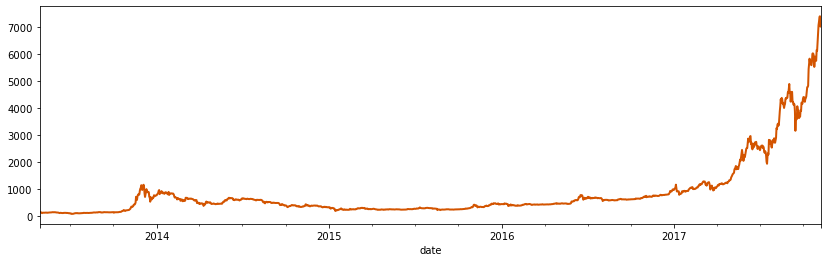

In [7]:
dataset.set_index('date')['close'].plot(
    linewidth=2,
    figsize=(14, 4),
    color='#d35400');

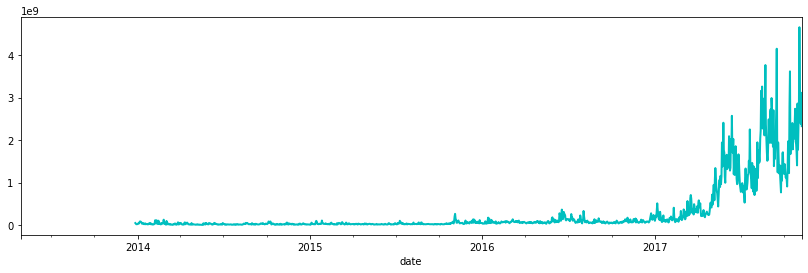

In [8]:
dataset.set_index('date')['volume'].plot(
    linewidth=2,
    figsize=(14, 4),
    color='c');

In [9]:
dataset_recent = dataset[dataset['date']>= '2016-01-01']

In [10]:
dataset_recent.head()

,date,iso_week,open,high,low,close,volume,market_capitalization
978,2016-01-01,2016-00,430.72,436.25,427.51,434.33,36278900.0,6.473530e+09
979,2016-01-02,2016-00,434.62,436.06,431.87,433.44,30096600.0,6.533630e+09
980,2016-01-03,2016-01,433.58,433.74,424.71,430.01,39633800.0,6.519500e+09
981,2016-01-04,2016-01,430.06,434.52,429.08,433.09,38477500.0,6.468180e+09
982,2016-01-05,2016-01,433.07,434.18,429.68,431.96,34522600.0,6.515380e+09


In [11]:
dataset_recent['close_point_relative_normalization'] = dataset.groupby('iso_week')['close'].apply(lambda x: normalizations.point_relative_normalization(x))
dataset_recent['close_point_relative_normalization'] 

<ipython-input-11-1f59c698b218>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_recent['close_point_relative_normalization'] = dataset.groupby('iso_week')['close'].apply(lambda x: normalizations.point_relative_normalization(x))


978     0.000000
979    -0.002049
980     0.000000
981     0.007163
982     0.004535
          ...   
1650    0.171260
1651    0.199241
1652    0.000000
1653   -0.051928
1654   -0.035509
Name: close_point_relative_normalization, Length: 677, dtype: float64

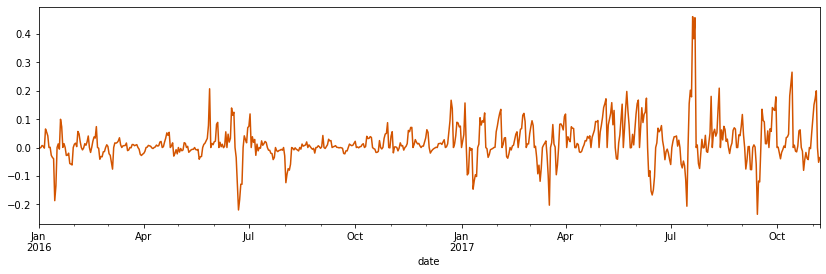

In [12]:
dataset_recent.set_index('date')['close_point_relative_normalization'].plot(figsize=(14, 4), color='#d35400');

In [13]:
dataset_recent['volume_point_relative_normalization'] = dataset.groupby('iso_week')['volume'].apply(lambda x: normalizations.point_relative_normalization(x))
dataset_recent['volume_point_relative_normalization'] 

<ipython-input-13-15d952c36e3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_recent['volume_point_relative_normalization'] = dataset.groupby('iso_week')['volume'].apply(lambda x: normalizations.point_relative_normalization(x))


978     0.000000
979    -0.170410
980     0.000000
981    -0.029175
982    -0.128961
          ...   
1650    0.178668
1651   -0.131247
1652    0.000000
1653    0.307296
1654   -0.022715
Name: volume_point_relative_normalization, Length: 677, dtype: float64

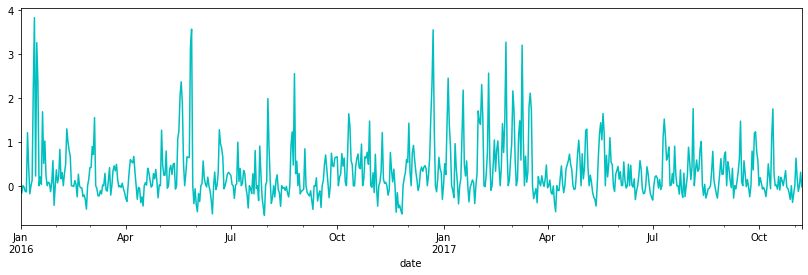

In [14]:
dataset_recent.set_index('date')['volume_point_relative_normalization'].plot(figsize=(14, 4), color='c');

In [15]:
boundary = int(0.8 * dataset_recent['iso_week'].nunique())
train_set_weeks = dataset_recent['iso_week'].unique()[0:boundary]
test_set_weeks = dataset_recent[~dataset_recent['iso_week'].isin(train_set_weeks)]['iso_week'].unique()

print(train_set_weeks)
print(test_set_weeks)

['2016-00' '2016-01' '2016-02' '2016-03' '2016-04' '2016-05' '2016-06'
 '2016-07' '2016-08' '2016-09' '2016-10' '2016-11' '2016-12' '2016-13'
 '2016-14' '2016-15' '2016-16' '2016-17' '2016-18' '2016-19' '2016-20'
 '2016-21' '2016-22' '2016-23' '2016-24' '2016-25' '2016-26' '2016-27'
 '2016-28' '2016-29' '2016-30' '2016-31' '2016-32' '2016-33' '2016-34'
 '2016-35' '2016-36' '2016-37' '2016-38' '2016-39' '2016-40' '2016-41'
 '2016-42' '2016-43' '2016-44' '2016-45' '2016-46' '2016-47' '2016-48'
 '2016-49' '2016-50' '2016-51' '2016-52' '2017-01' '2017-02' '2017-03'
 '2017-04' '2017-05' '2017-06' '2017-07' '2017-08' '2017-09' '2017-10'
 '2017-11' '2017-12' '2017-13' '2017-14' '2017-15' '2017-16' '2017-17'
 '2017-18' '2017-19' '2017-20' '2017-21' '2017-22' '2017-23' '2017-24'
 '2017-25']
['2017-26' '2017-27' '2017-28' '2017-29' '2017-30' '2017-31' '2017-32'
 '2017-33' '2017-34' '2017-35' '2017-36' '2017-37' '2017-38' '2017-39'
 '2017-40' '2017-41' '2017-42' '2017-43' '2017-44' '2017-45']


In [16]:
train_dataset = dataset_recent[dataset_recent['iso_week'].isin(train_set_weeks)]

In [17]:
test_dataset = dataset_recent[dataset_recent['iso_week'].isin(test_set_weeks)]

In [18]:
dataset_recent.to_csv('dataset_recent.csv', index=False)
train_dataset.to_csv('train_dataset.csv', index=False)
test_dataset.to_csv('test_dataset.csv', index=False)